# Spam Email Classification

In [132]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

# Importing functions from another jupyter notebook
!pip install nbimporter

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Data Preparation:

### Load the datasets:

In [134]:
import nbimporter
import spambase_dataset_loader_nb

loader = spambase_dataset_loader_nb.SpambaseDatasetLoader()

init Loader notebook


In [135]:
help(loader.load_dataset)

Help on method load_dataset in module spambase_dataset_loader_nb:

load_dataset(url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data') method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (string) --> None
    
    This function retrieves the spambase.data from University of California Irvine (UCI) - Dataset Repository
    and save into two files:
    
    1. spambase_all.csv - The CSV file that contain all the rows from spambase.data.
    2. spambase_balance.csv - The CSV file that rows balance between spam and not spam records.



In [136]:
loader.load_dataset()

Loading dataset.
Loading spambase_all.csv completed.
Loading spambase_balance.csv completed.


In [137]:
spambase_all = loader.get_full_dataset()
spambase_all_bak = spambase_all.copy()

get_balance_all


### Data Exploration

#### Explore the data using info() and describe() and head()

In [138]:
spambase_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target_spam_nonspam         4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4601 non-null   float64
 4   word_freq_3d                4601 non-null   float64
 5   word_freq_our               4601 non-null   float64
 6   word_freq_over              4601 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4601 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [139]:
spambase_all.describe()

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.394045,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.488698,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,1.000000,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,1.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [140]:
spambase_all.head(5)

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


#### Check for null values.

<AxesSubplot:>

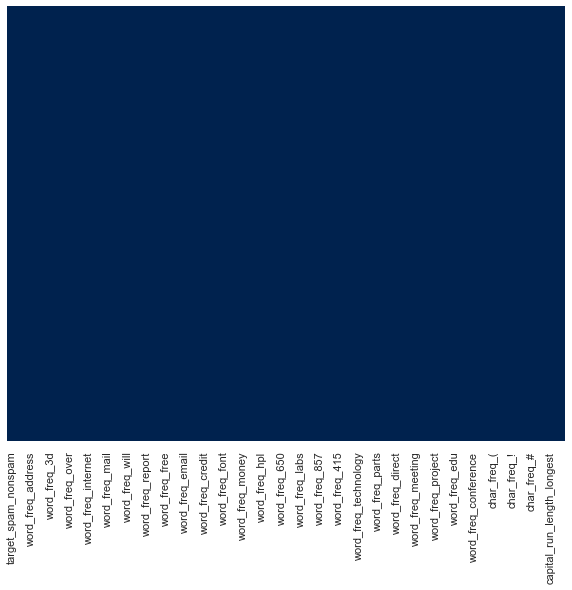

In [141]:
plt.figure(figsize=(10, 8))

ax = plt.axes()
sns.heatmap(spambase_all.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="cividis")


#### Check for na

In [142]:
spambase_all.isna().any()

target_spam_nonspam           False
word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george            

#### Check for data imbalance

[Text(0.5, 0, 'Spam or not')]

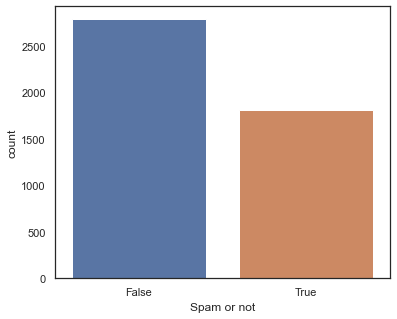

In [143]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')

spambase_all_exp = spambase_all.copy()
spambase_all_exp["target_spam_nonspam"] = spambase_all_exp["target_spam_nonspam"].astype(bool)

ax = sns.countplot(x='target_spam_nonspam', data=spambase_all_exp) 
ax.set(xlabel='Spam or not')

#### Explore for Correlations
The large number of features makes it difficult to determine the correlations.

<AxesSubplot:>

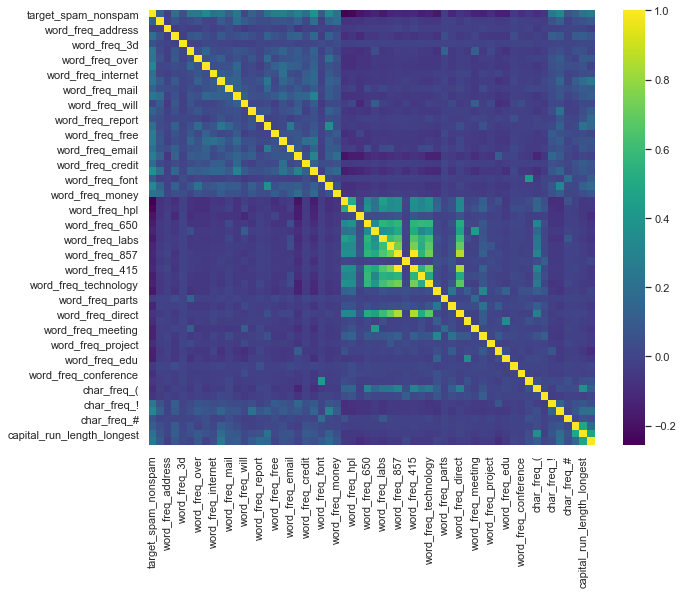

In [144]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(spambase_all_exp.corr(), cmap='viridis')

### Challenges
* Imbalance Binary Classification
* Large number of features

### Solutions

#### Pandas Undersampling for Imbalanced Binary Classification

In [145]:
spam = spambase_all[spambase_all['target_spam_nonspam']==1]
non_spam = spambase_all[spambase_all['target_spam_nonspam']==0]
non_spam = non_spam.sample(n=len(spam), random_state=101)
spambase_balance = pd.concat([spam, non_spam],axis=0)  

# an alternative is simply use the loader.get_balance_dataset()
# since SpambaseDatasetLoader already handled the undersampling during load.

spambase_balance = loader.get_balance_dataset()

get_balance_data


[Text(0.5, 0, 'Spam or not')]

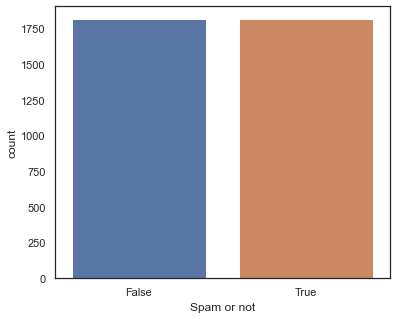

In [153]:
spambase_balance_exp = spambase_balance.copy()
spambase_balance_exp["target_spam_nonspam"] = spambase_balance_exp["target_spam_nonspam"].astype(bool)

sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')
ax = sns.countplot(x='target_spam_nonspam', data=spambase_balance_exp) 
ax.set(xlabel='Spam or not')

#### Feature Selection using P value

In [147]:
help(loader.perform_feature_selection)

Help on method perform_feature_selection in module spambase_dataset_loader_nb:

perform_feature_selection(data, threshold=0.05) method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (DataFrame, float) --> Dataframe
    
    
    This function performs feature selection using backward elimination technique.        
            
    Parameters
    ----------
    data: Dataframe that will be use in feature selection.
    
    threshold: If the p-value is higher than the threshold, we discard the combinations of features.
    
    Returns
    ----------        
    DataFrame : The DataFrame without after performing feature selection.



In [148]:
result = loader.perform_feature_selection(data=spambase_balance, threshold=0.05)

X = result[0]
y = result[1]

The shape before feature selection: (3626, 58)
The shape after feature selection: (3626, 37)


## Model

### Split the data

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

print('The X_train: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('The X_test: {},  y_test  shape: {}'.format(X_train.shape, y_train.shape))

The X_train: (2900, 37), y_train shape: (2900, 1)
The X_test: (2900, 37),  y_test  shape: (2900, 1)


### Statsmodels

In [150]:
import statsmodels.api as sm

logitReg = sm.Logit(y_train, X_train)
logit_fit = logitReg.fit()

logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.281660
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     target_spam_nonspam   No. Observations:                 2900
Model:                           Logit   Df Residuals:                     2863
Method:                            MLE   Df Model:                           36
Date:                 Tue, 18 Jul 2023   Pseudo R-squ.:                  0.5936
Time:                         23:02:09   Log-Likelihood:                -816.81
converged:                        True   LL-Null:                       -2010.1
Covariance Type:             nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
word_freq_make                -0.7245      0.243     -2.987      0.003      -1.200      -0.249
word_freq_all                 -0.1770      0.123     -1.442      0.149      -0.417       0.064
word_freq_3d                   1.6219      1.306      1.241      0.214      -0.939       4.182
word_freq_our                  0.5516      0.132      4.191      0.000       0.294       0.810
word_freq_over                 0.6387      0.288      2.220      0.026       0.075       1.203
word_freq_remove               2.1860      0.387      5.650      0.000       1.428       2.944
word_freq_internet             0.3060      0.141      2.178      0.029       0.031       0.581
word_freq_order                0.7552      0.329      2.295      0.022       0.110       1.400
word_freq_mail                 0.0018      0.078      0.023      0.982      -0.150       0.154
word_freq_people              -0.3204      0.226     -1.420      0.156      -0.763       0.122
word_freq_free                 1.0005      0.179      5.580      0.000       0.649       1.352
word_freq_business             0.6923      0.234      2.954      0.003       0.233       1.152
word_freq_email                0.0720      0.125      0.576      0.564      -0.173       0.317
word_freq_you                 -0.1251      0.036     -3.429      0.001      -0.197      -0.054
word_freq_credit               2.5712      0.772      3.331      0.001       1.058       4.084
word_freq_your                 0.1891      0.057      3.322      0.001       0.078       0.301
word_freq_font                 0.3975      0.182      2.188      0.029       0.041       0.754
word_freq_000                  2.3639      0.591      4.002      0.000       1.206       3.521
word_freq_money                0.6746      0.308      2.192      0.028       0.071       1.278
word_freq_hp                  -1.7100      0.306     -5.587      0.000      -2.310      -1.110
word_freq_hpl                 -1.7390      0.499     -3.482      0.000      -2.718      -0.760
word_freq_labs                -1.1186      0.574     -1.948      0.051      -2.244       0.007
word_freq_85                  -2.6742      0.782     -3.419      0.001      -4.207      -1.141
word_freq_technology           0.4471      0.357      1.251      0.211      -0.253       1.147
word_freq_pm                  -1.1640      0.416     -2.800      0.005      -1.979      -0.349
word_freq_meeting             -3.0444      0.862     -3.531      0.000      -4.734      -1.354
word_freq_project             -3.2420      0.754     -4.298      0.000      -4.720      -1.764
word_freq_re                  -0.9546      0.155     -6.147      0.000      -1.259      -0.650
word_freq_edu                 -1.5982      0.299     -5.343      0.000      -2.185      -1.012
word_freq_table               -4.4683      2.409     -1.855      0.064      -9.189       0.253
char_freq_;                   -1.6124      0.603     -2.672      0.008      -2.795      -0.430
ch

### Sklearn

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)


pred_1=lr.predict(X_test)
score_1=accuracy_score(y_test,pred_1)

list_scores.append(score_1)
list_models.append('logisticRegression')

D:\x-20a\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [152]:
list_scores

[0.9173553719008265]

## Conclusion